In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=19000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

In [52]:
any_images = np.random.choice(range(X_train.shape[0]),49)
X = X_train[any_images,:]
X = X.reshape(X.shape[0],-1)
mean = np.mean(X, axis = 0)
X -= mean # zero-center the data (important)
cov = np.dot(X.T, X) / X.shape[0] # get the data covariance matrix

U,S,V = np.linalg.svd(cov) 


In [53]:
mean

array([ 126.20408163,  137.02040816,  133.95918367, ...,  132.51020408,
        132.36734694,  120.85714286])

In [101]:
Xrot = np.dot(X, U) # decorrelate the data
print U.shape
print Xrot.shape
Xrot_reduced = np.dot(X, U[:,:144])
Xwhite = Xrot / np.sqrt(S + 1e-3)
# Xwhite = Xwhite[:,0:144]

print Xwhite.shape
# # print Xrot_reduced.shape #projecting the original data on only 144 dimensions
temp = U[:,:144].T
# # print temp.shape
X_recover = np.dot(Xrot_reduced,temp)
Xwhite_recover = np.dot(Xwhite,U.T)
X_recover = X_recover + mean
Xwhite_recover = Xwhite_recover + mean

X_recover = X_recover.reshape(X.shape[0],32,32,3)
Xwhite_recover = Xwhite_recover.reshape(X.shape[0],32,32,3)
# print Xwhite_recover

(3072, 3072)
(49, 3072)
(49, 3072)


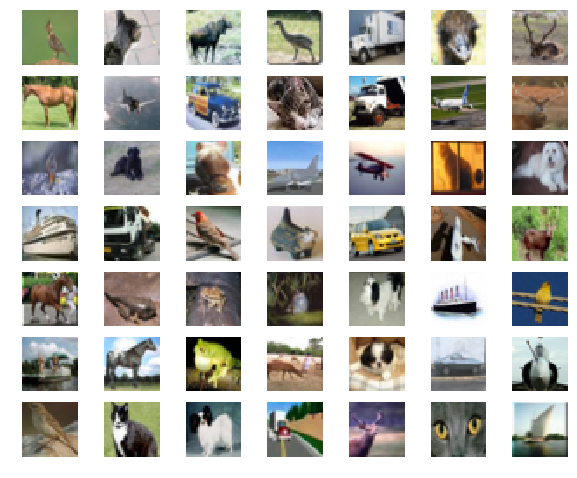

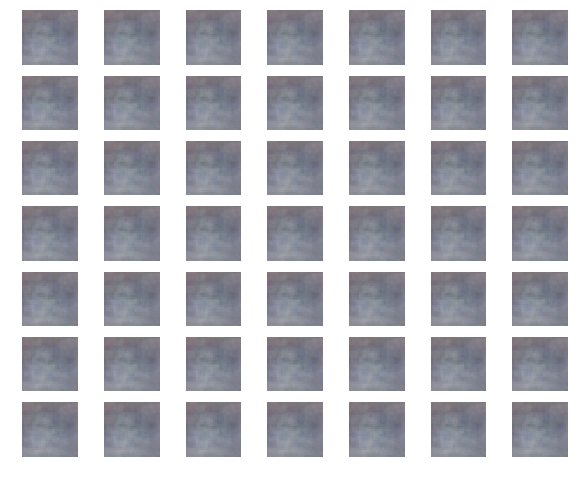

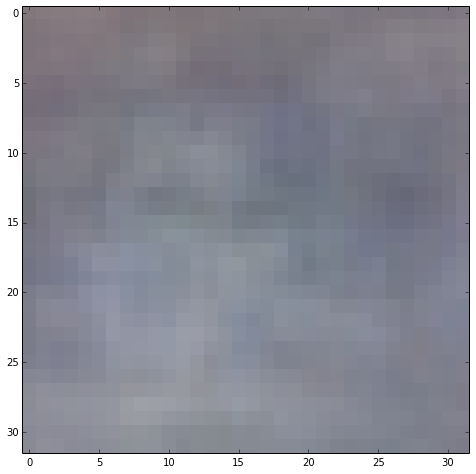

In [102]:
# # Visualize some examples from the dataset.
# # We show a few examples of training images from each class.
# classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# num_classes = len(classes)
# samples_per_class = 7
# for y, cls in enumerate(classes):
#     idxs = np.flatnonzero(y_train == y)
#     idxs = np.random.choice(idxs, samples_per_class, replace=False)
#     for i, idx in enumerate(idxs):
#         plt_idx = i * num_classes + y + 1
#         plt.subplot(samples_per_class, num_classes, plt_idx)
#         plt.imshow(X_train[idx].astype('uint8'))
#         plt.axis('off')
#         if i == 0:
#             plt.title(cls)
# plt.show()

X_recovers = X.reshape(X.shape[0],32,32,3)
for i in xrange(X.shape[0]):
    plt.subplot(7,7,i)
    plt.imshow(X_recover[i].astype('uint8'))
    plt.axis('off')


plt.show()

for i in xrange(X.shape[0]):
    plt.subplot(7,7,i)
    plt.imshow(Xwhite_recover[i].astype('uint16'))
    plt.axis('off')

plt.show()
plt.imshow(Xwhite_recover[1].astype('uint16'))
plt.show()